In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline

In [3]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
data = pd.read_csv(url, names=names)

In [4]:
data.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#Shape of the Dataset
data.shape

(699, 11)

## Data pre-processing

In [7]:
data.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [8]:
data.drop(['id'],axis=1,inplace = True)

In [9]:
# Columns in the dataset
data.columns

Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [10]:
for i in data.columns:
    print('*********************************\n',data[i].value_counts().sort_index())

*********************************
 clump_thickness
1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: count, dtype: int64
*********************************
 uniform_cell_size
1     384
2      45
3      52
4      40
5      30
6      27
7      19
8      29
9       6
10     67
Name: count, dtype: int64
*********************************
 uniform_cell_shape
1     353
2      59
3      56
4      44
5      34
6      30
7      30
8      28
9       7
10     58
Name: count, dtype: int64
*********************************
 marginal_adhesion
1     407
2      58
3      58
4      33
5      23
6      22
7      13
8      25
9       5
10     55
Name: count, dtype: int64
*********************************
 single_epithelial_size
1      47
2     386
3      72
4      48
5      39
6      41
7      12
8      21
9       2
10     31
Name: count, dtype: int64
*********************************
 bare_nuclei
1     402
10    132
2      30
3      28
4      19
5   

Insight: We have 16 ambiguity value called '?' in bare_nuclei.

# Handling missing values

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clump_thickness         699 non-null    int64 
 1   uniform_cell_size       699 non-null    int64 
 2   uniform_cell_shape      699 non-null    int64 
 3   marginal_adhesion       699 non-null    int64 
 4   single_epithelial_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chromatin         699 non-null    int64 
 7   normal_nucleoli         699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [14]:
#Diagnosis class Malignant = 4 and Benign = 2
#The number of Benign and Maglinant cases from the dataset
data['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

In [15]:
data['bare_nuclei'].value_counts()

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [16]:
data[data['bare_nuclei'] == '?']

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [17]:
data[data['bare_nuclei'] == '?'].sum()

clump_thickness                         54
uniform_cell_size                       39
uniform_cell_shape                      46
marginal_adhesion                       29
single_epithelial_size                  39
bare_nuclei               ????????????????
bland_chromatin                         50
normal_nucleoli                         44
mitoses                                 16
class                                   36
dtype: object

In [18]:
data.replace('?',np.nan,inplace=True)

In [19]:
data['bare_nuclei'][23]

nan

In [20]:
data.isna().sum()

clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [21]:
data.fillna(method='ffill', inplace=True)

C:\Users\india\AppData\Local\Temp\ipykernel_16948\2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [22]:
data.isna().sum()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [23]:
data['bare_nuclei'] = data['bare_nuclei'].astype('int64')

## Exploratory Data Analysis

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   clump_thickness         699 non-null    int64
 1   uniform_cell_size       699 non-null    int64
 2   uniform_cell_shape      699 non-null    int64
 3   marginal_adhesion       699 non-null    int64
 4   single_epithelial_size  699 non-null    int64
 5   bare_nuclei             699 non-null    int64
 6   bland_chromatin         699 non-null    int64
 7   normal_nucleoli         699 non-null    int64
 8   mitoses                 699 non-null    int64
 9   class                   699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [26]:
data.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.529328,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.635260,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Bivariate Data Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


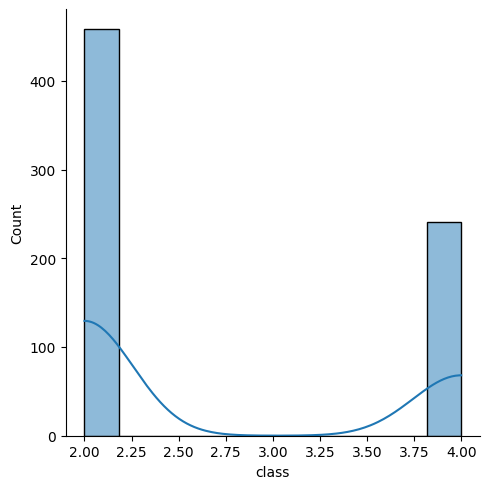

In [28]:
sns.displot(data['class'],kde=True)

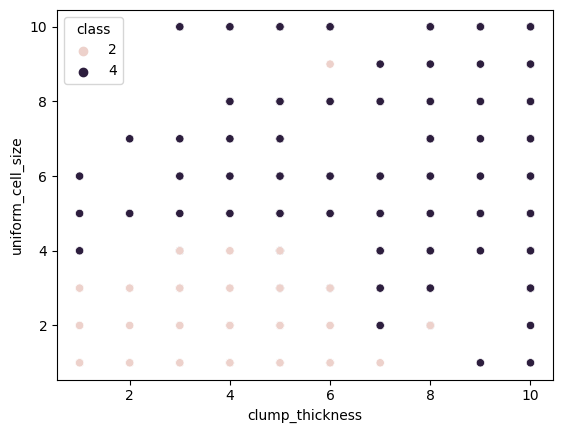

In [29]:
sns.scatterplot(data=data,x='clump_thickness',y='uniform_cell_size',hue='class')
plt.show()

## Multivariate Data Analysis

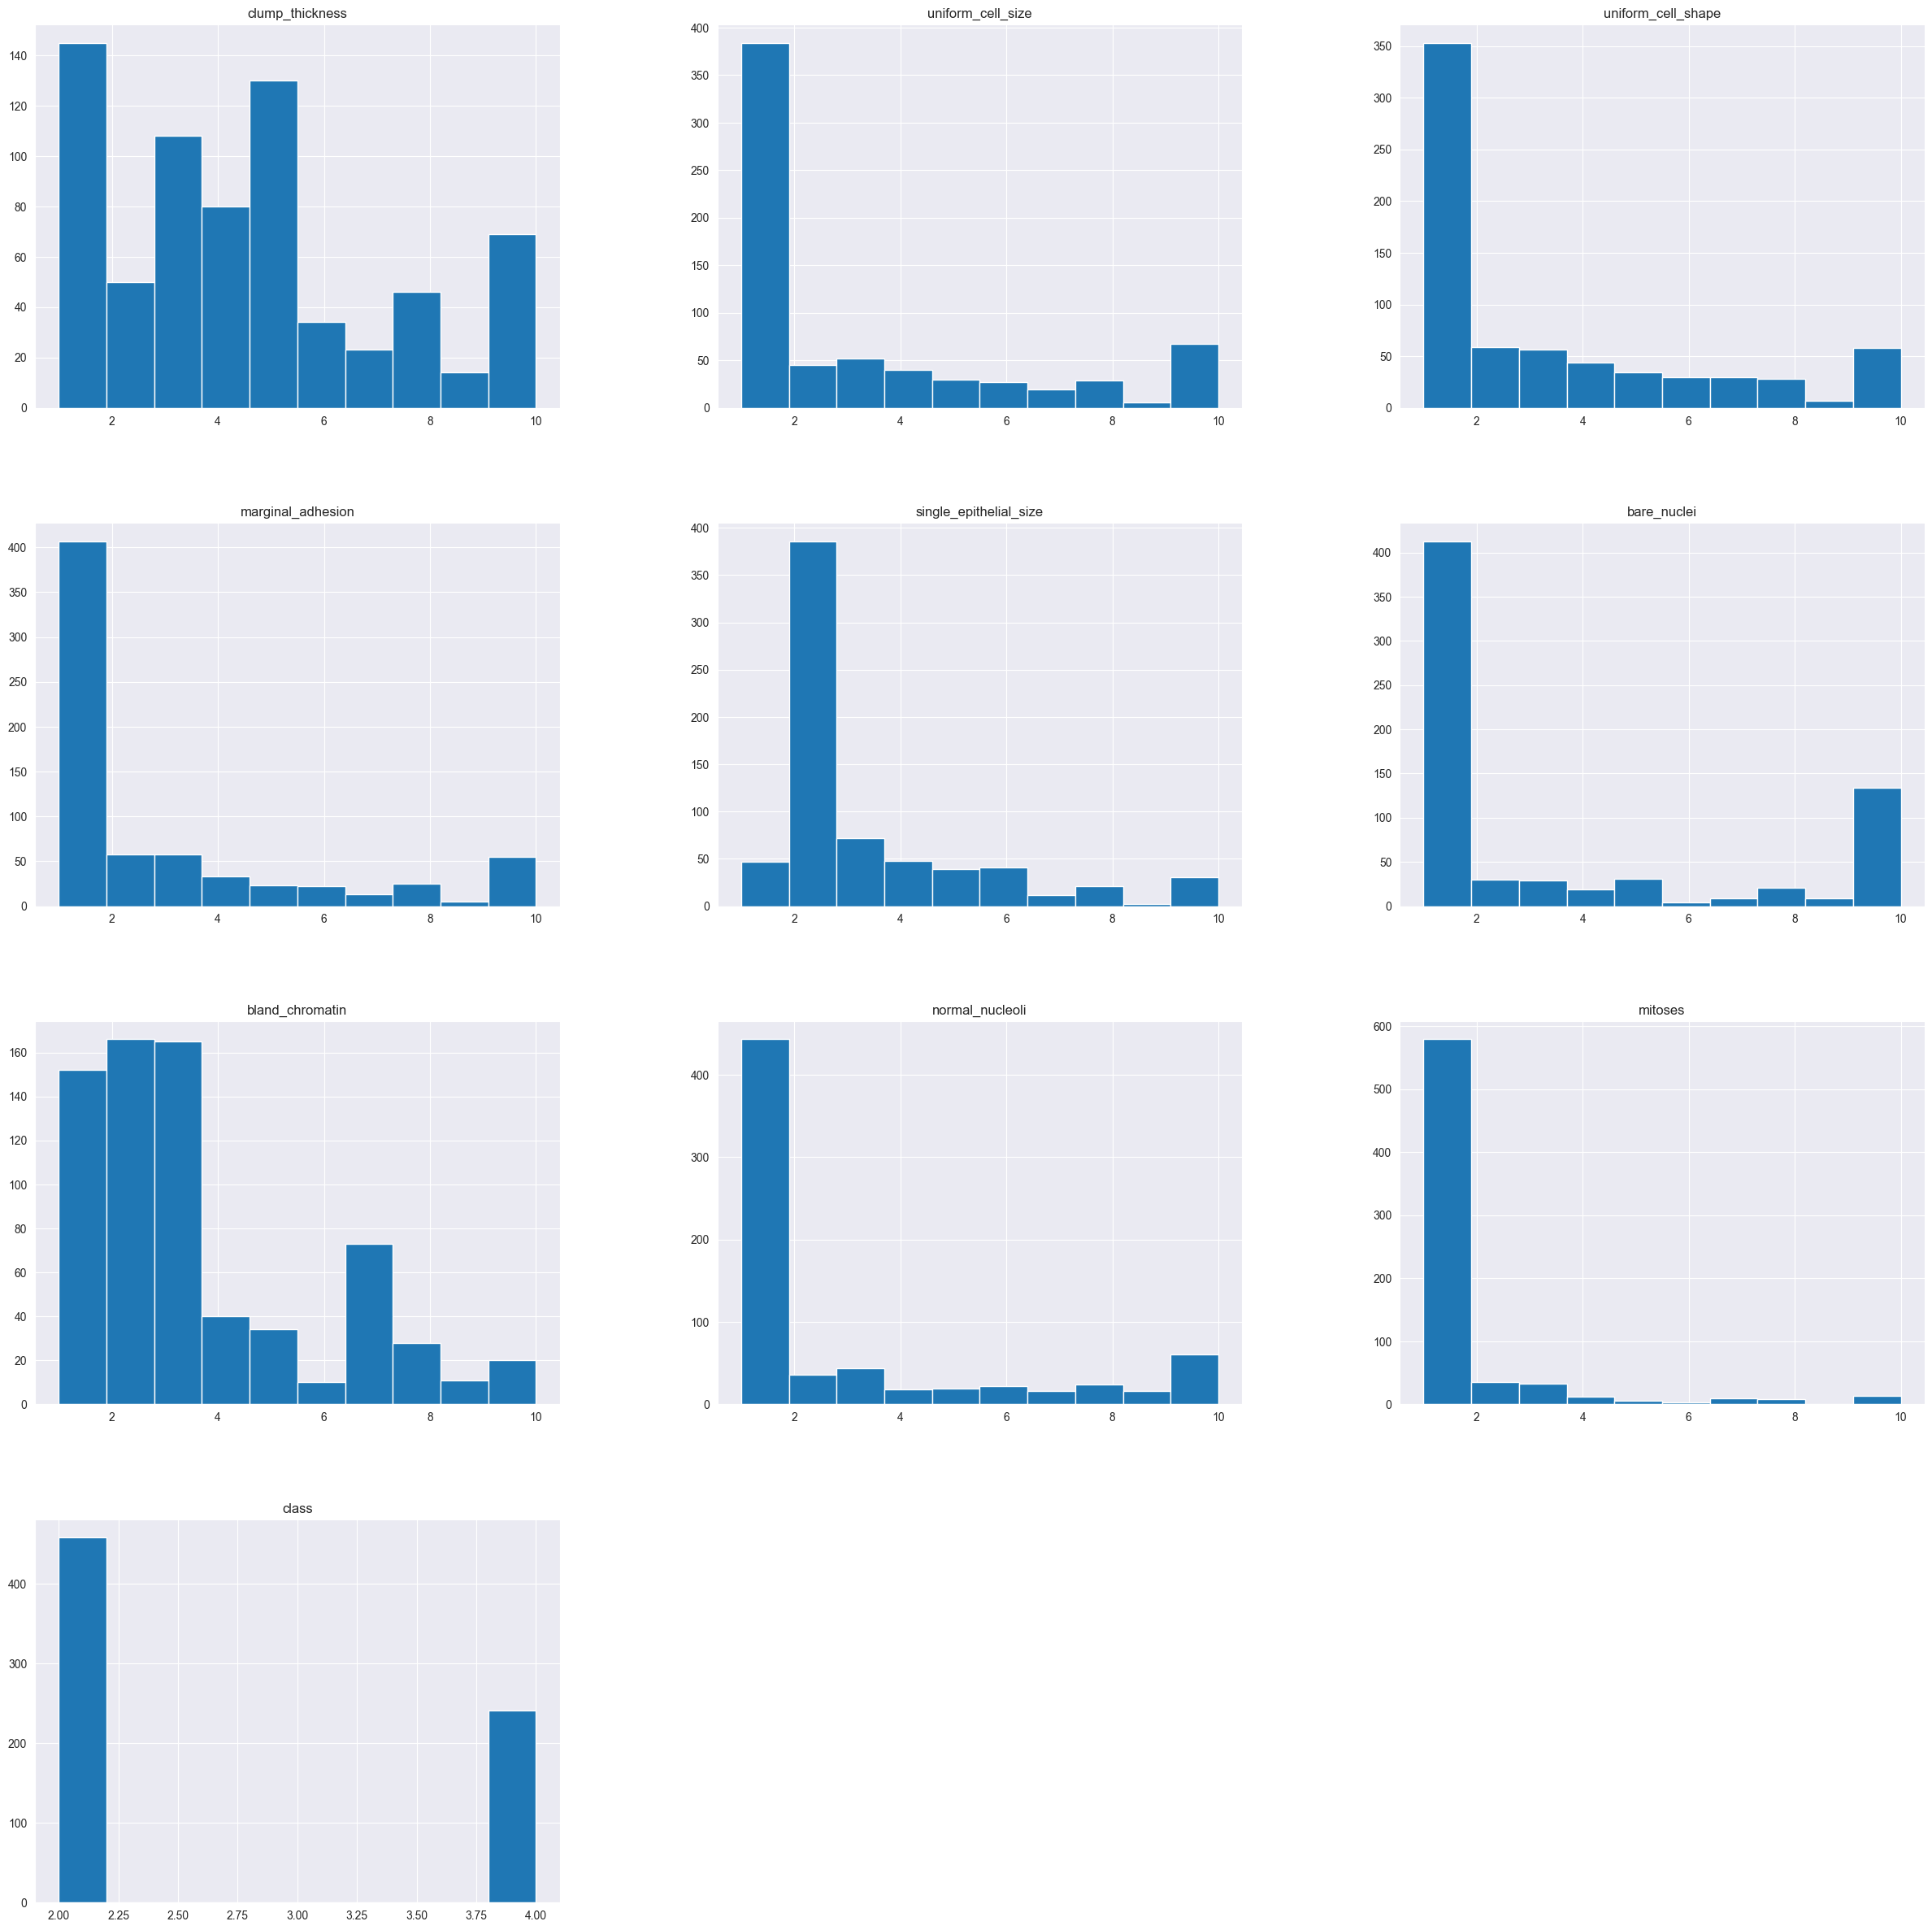

In [32]:
# Plot histograms for each variable
sns.set_style('darkgrid')
data.hist(figsize=(30,30))
plt.show()

<Axes: >

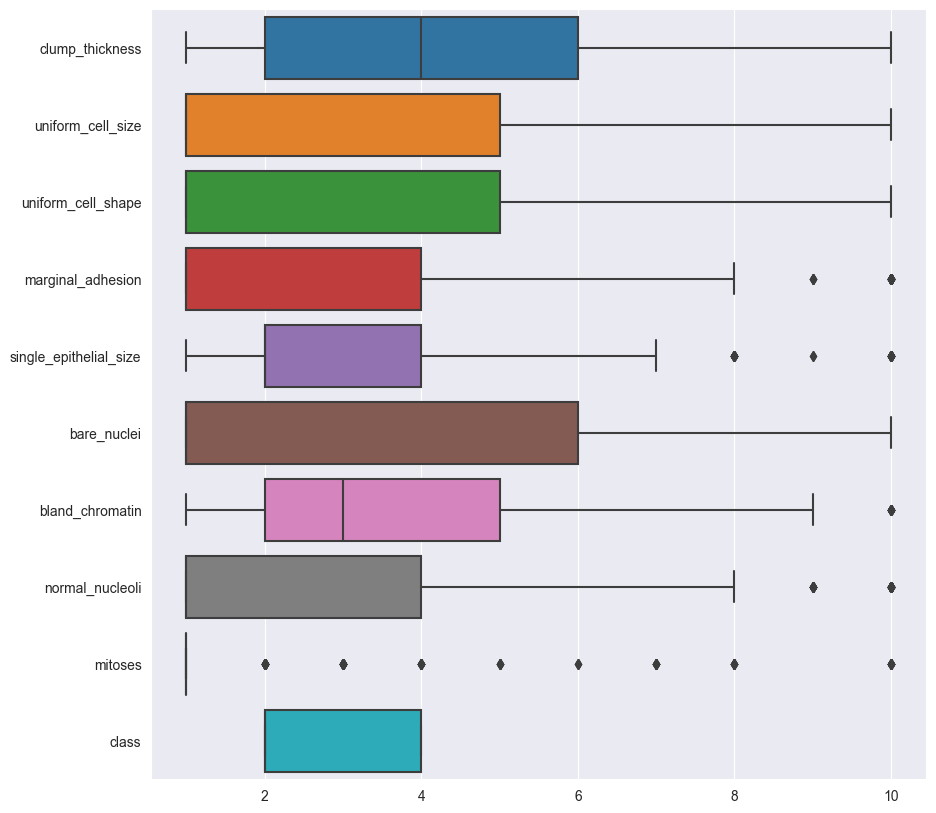

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,orient='h')

## Feature selection

In [47]:
data.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.583571,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.681309,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.701137,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.663669,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.579340,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.583571,0.681309,0.701137,0.663669,0.579340,1.000000,0.671398,0.571895,0.337078,0.807394
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671398,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.571895,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.337078,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.807394,0.756616,0.712244,0.423170,1.000000


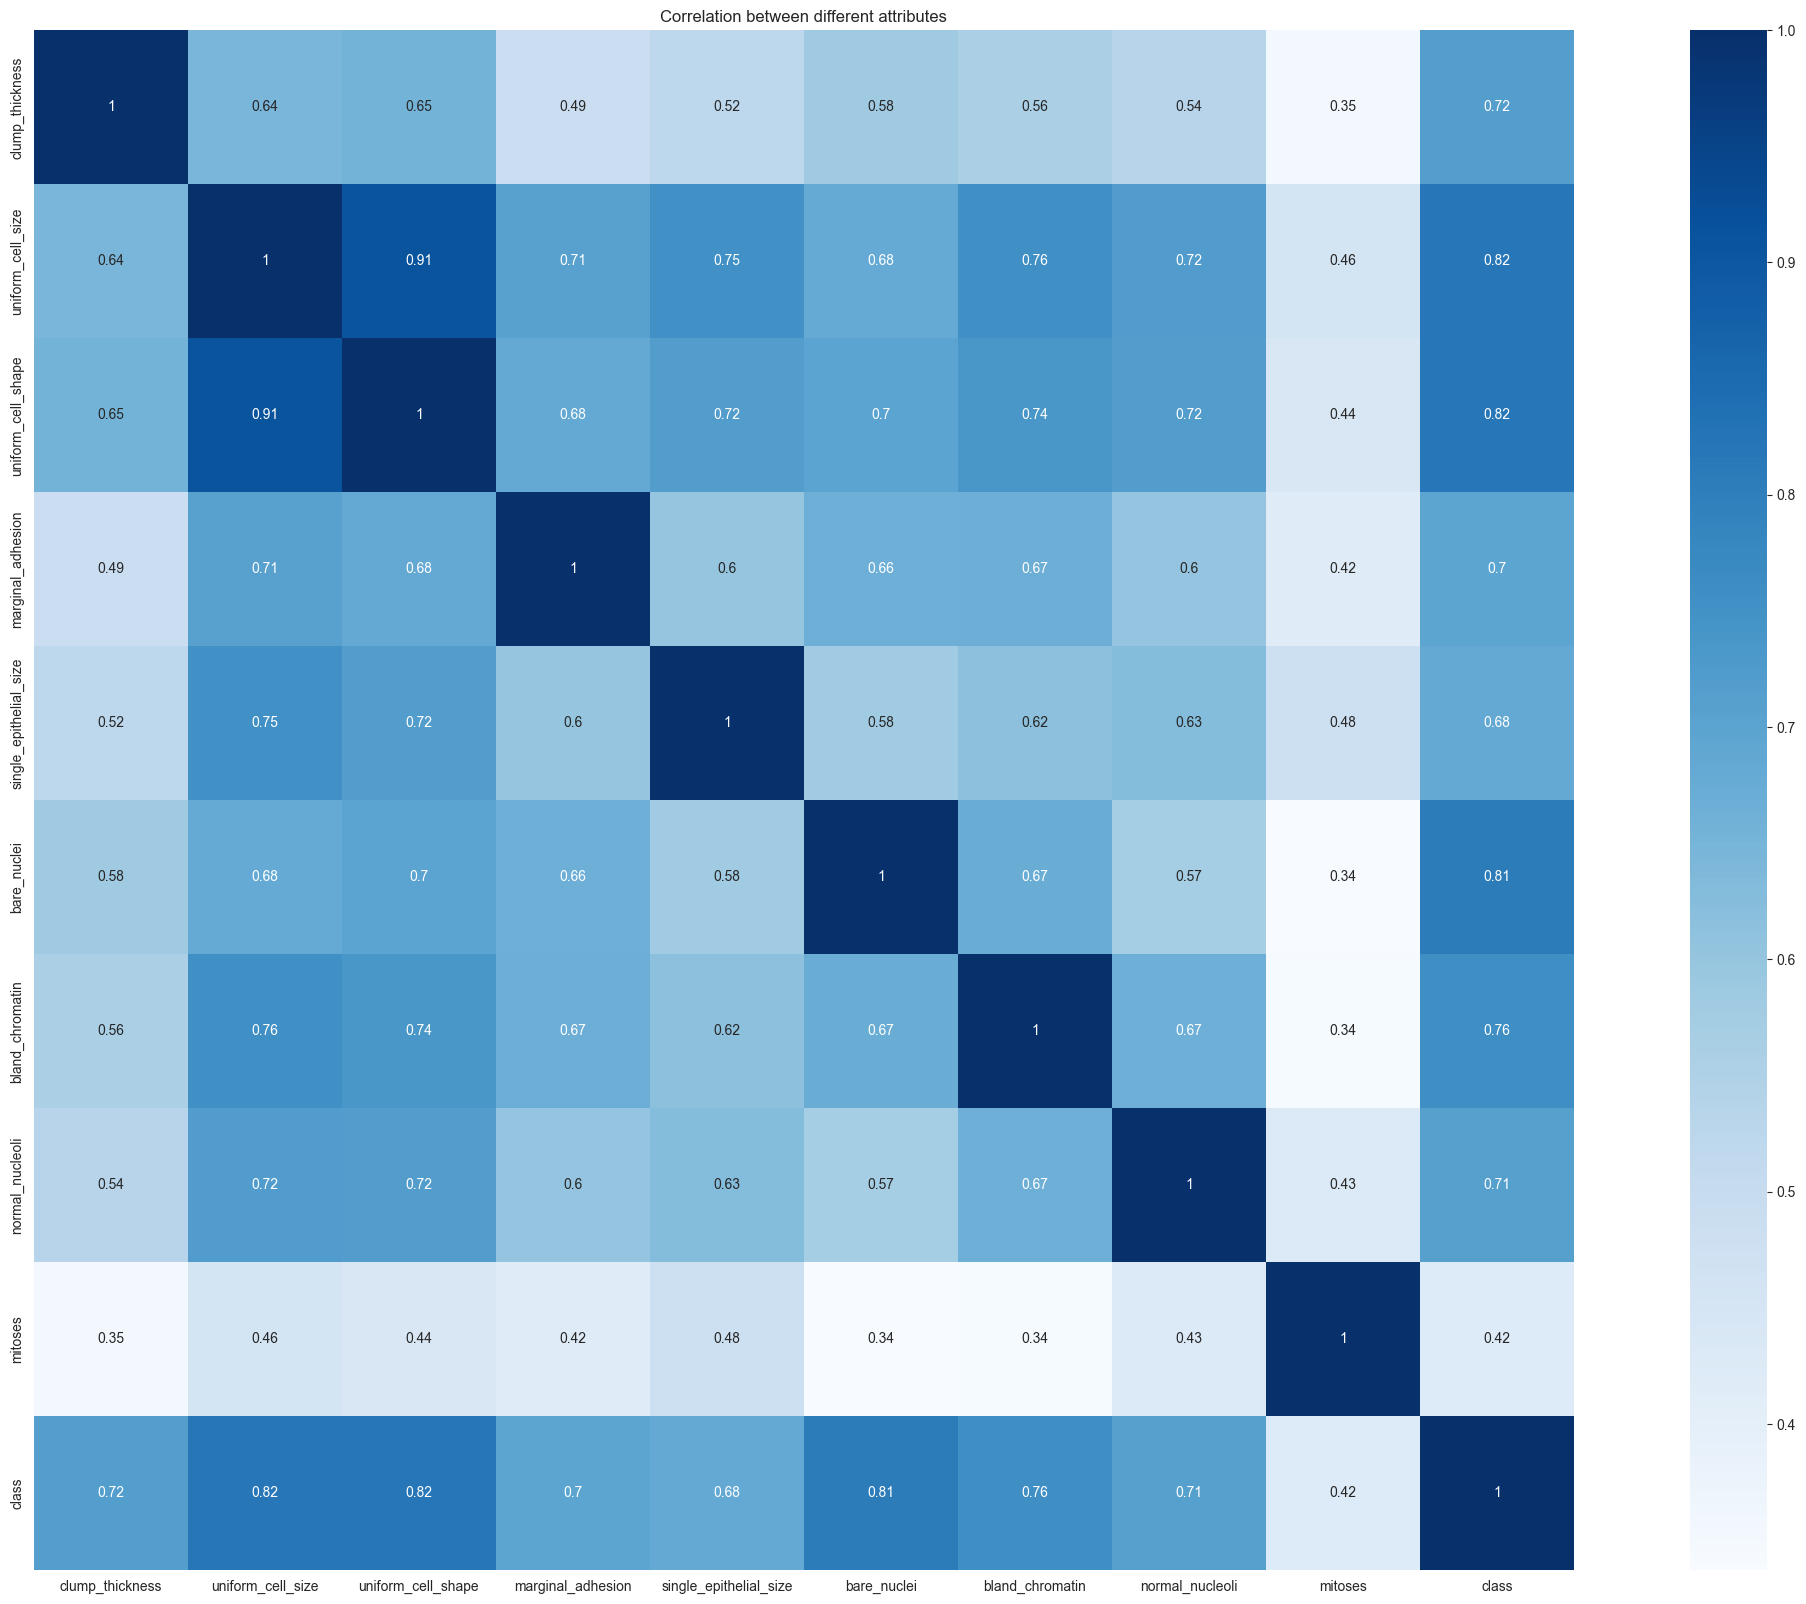

In [49]:
plt.figure(figsize=(30,20))
cor = data.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

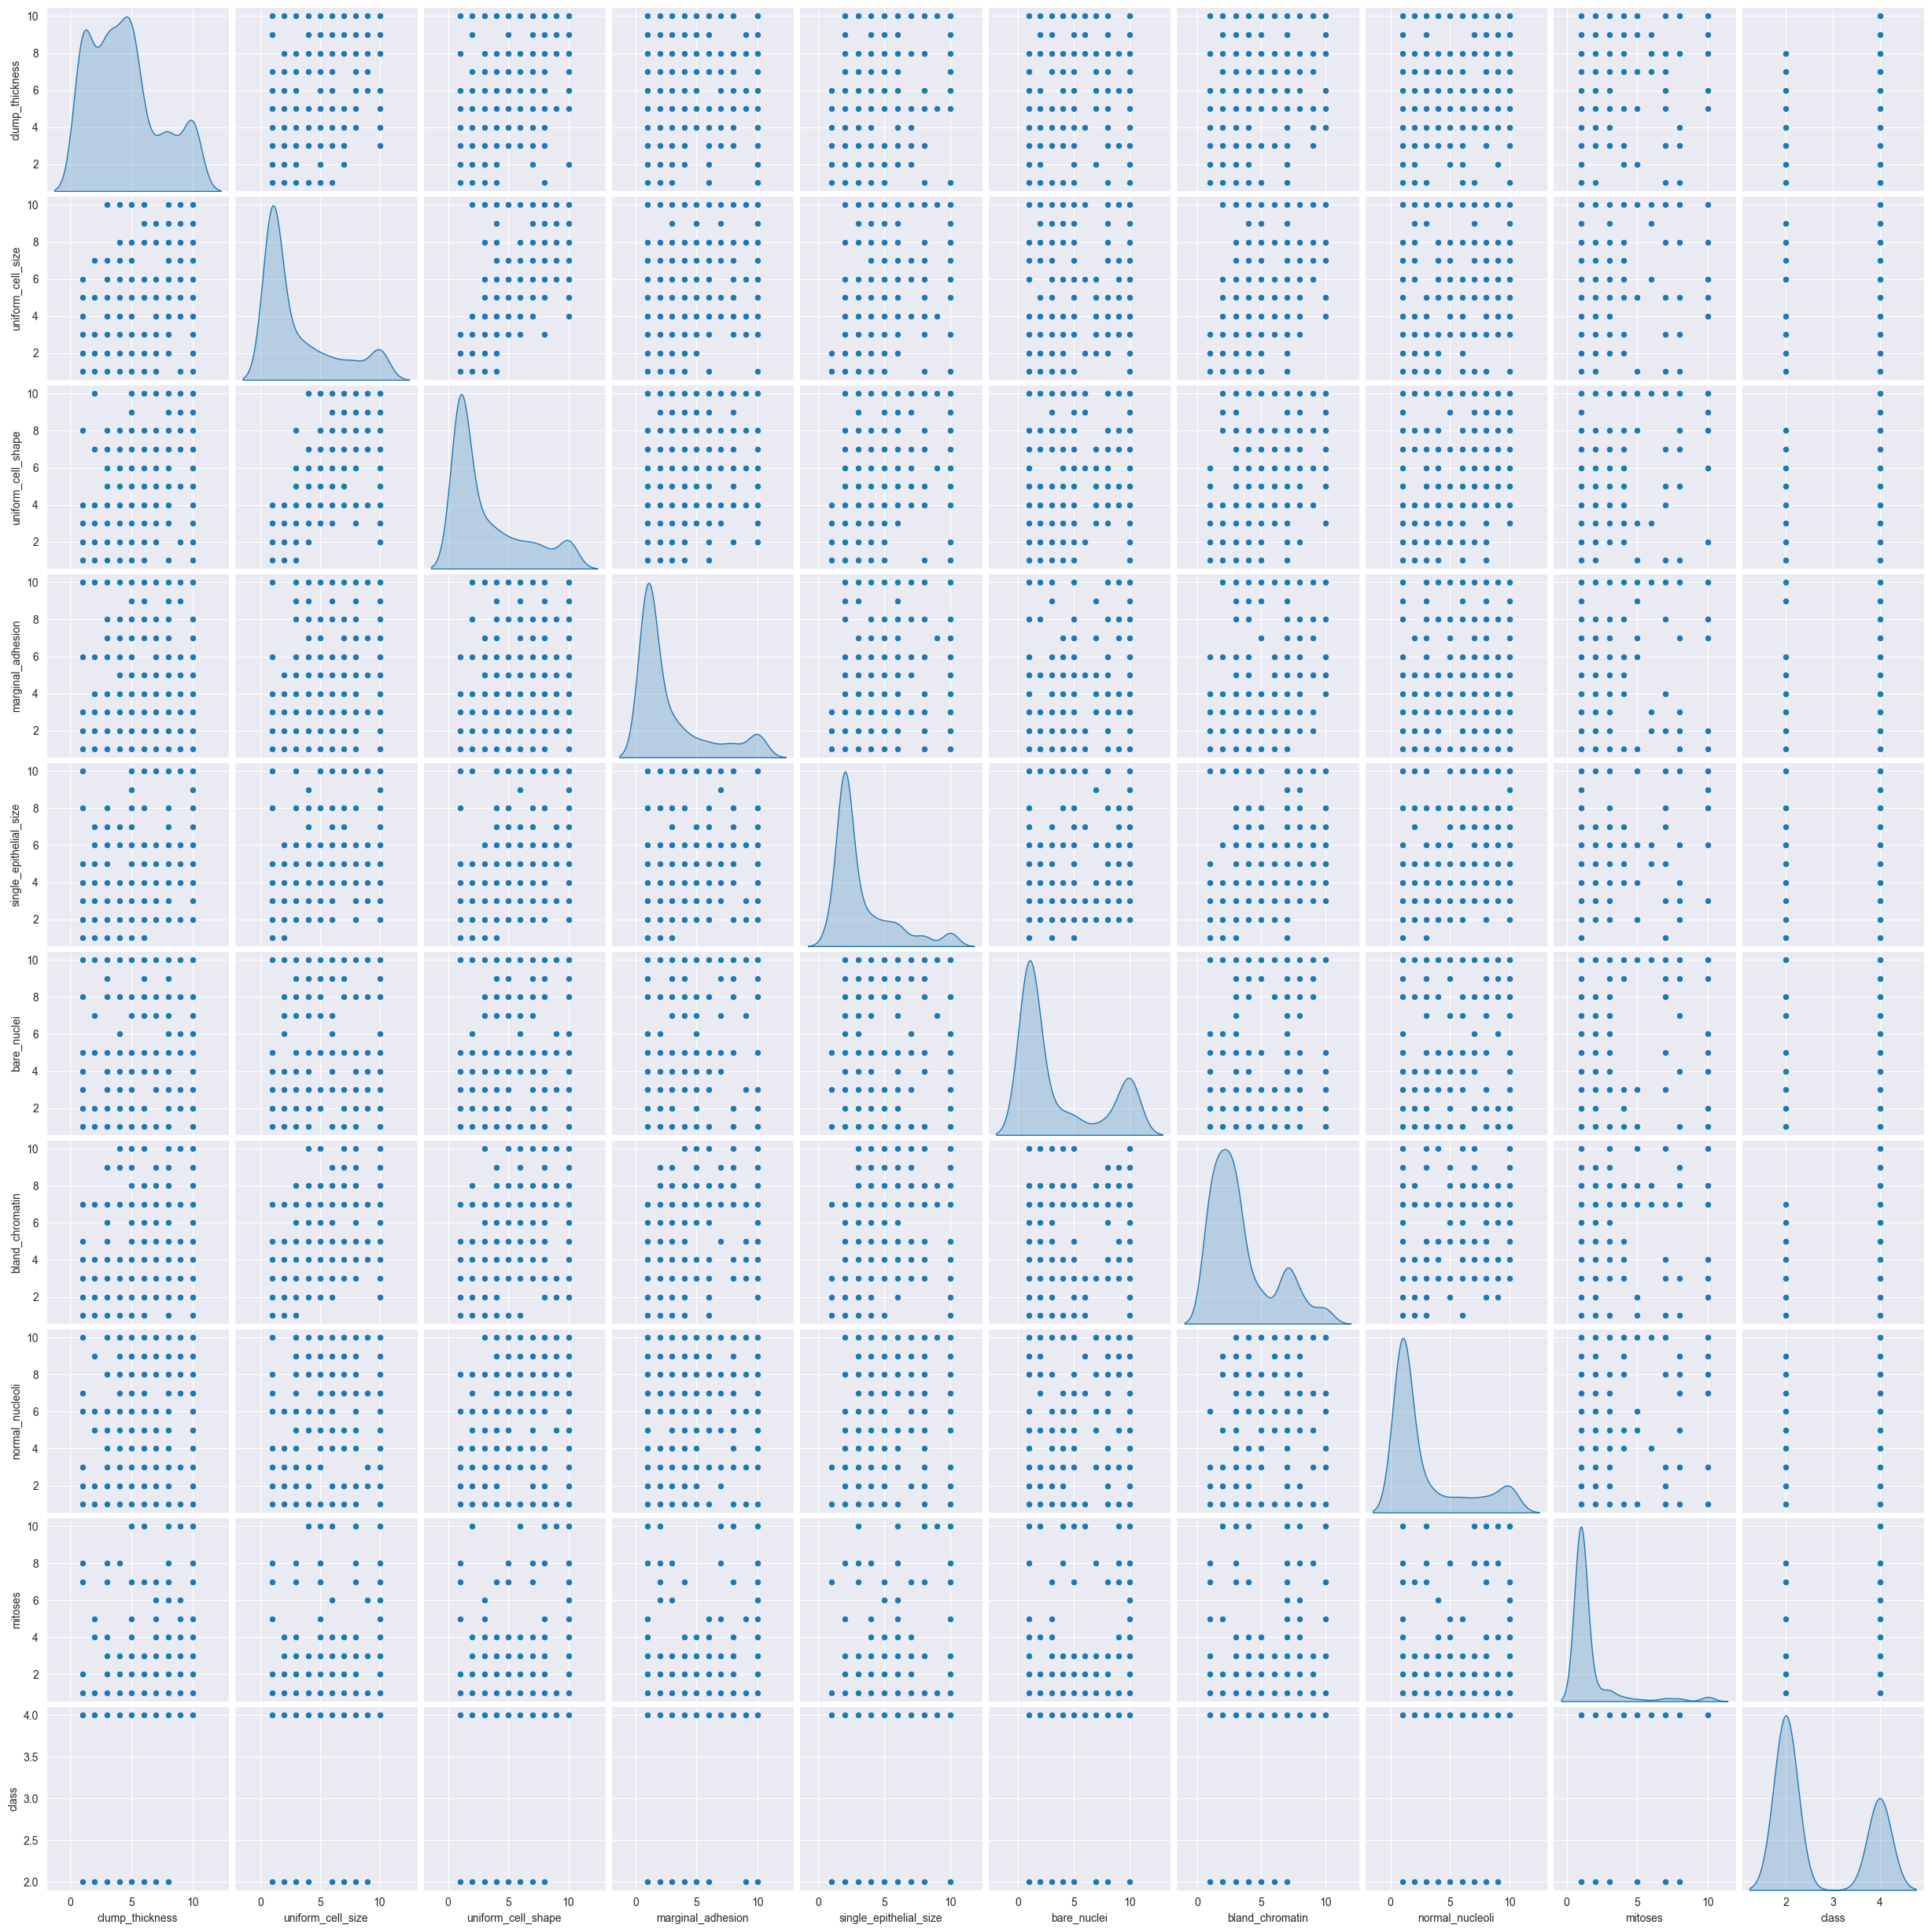

In [50]:
sns.pairplot(data,diag_kind='kde')

In [51]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

clump_thickness           0.716001
uniform_cell_size         0.817904
uniform_cell_shape        0.818934
marginal_adhesion         0.696800
single_epithelial_size    0.682785
bare_nuclei               0.807394
bland_chromatin           0.756616
normal_nucleoli           0.712244
mitoses                   0.423170
class                     1.000000
Name: class, dtype: float64

## Train and Test Model

In [54]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 

Y = data['class'].values
X = data.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [55]:
from sklearn.linear_model import LogisticRegression
tree=DecisionTreeClassifier()
rf=RandomForestClassifier()
logis=LogisticRegression()

In [56]:
tree.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
logis.fit(X_train,Y_train)

LogisticRegression()

In [57]:
# prediction
tree_pred=tree.predict(X_test)
rf_pred=rf.predict(X_test)
log_pred=logis.predict(X_test)

In [58]:
# Evaluation
tree_accuracy = accuracy_score(Y_test, tree_pred)
rf_accuracy = accuracy_score(Y_test, rf_pred)
log_accuracy = accuracy_score(Y_test, log_pred)

print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

Decision Tree Accuracy: 0.91
Random Forest Accuracy: 0.97
Logistic Regression Accuracy: 0.95


## Support Vector Machine

In [60]:
clf = RandomForestClassifier()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.9571428571428572


array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2], dtype=int64)

In [61]:
example_measures = [[4,2,1,1,1,2,3,2,1]]
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [62]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[4,2,1,1,1,2,3,2,1]]))

[2]
